In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import statsmodels.api as stats
from sklearn.preprocessing import StandardScaler

In [2]:
rand_state = 2

Load Data

In [3]:
data = pd.read_csv('/Users/coleromanyk/Documents/GitHub/Capstone-2/Data/wrangled_data.csv')

In [4]:
data.head()

,year,nitrogen,phosphate,potash,precipitation,average_temperature,accumulated_gdd,full_till_ratio,cover_crop_ratio,efficiency,total_acres,emissions,yield
0,1990,139.0,75.0,111.0,50.44,54.4,3031.0,0.760834,0.0,39.011486,5450.0,3.306718,129
1,1991,135.0,78.0,112.0,37.56,54.8,3610.0,0.678371,0.0,26.224166,5550.0,3.508214,92
2,1992,143.0,66.0,107.0,44.22,52.6,2817.0,0.620331,0.0,43.539021,5970.0,3.376282,147
3,1993,134.0,68.0,114.0,50.78,52.0,3079.0,0.491073,0.0,46.144325,5400.0,2.860590,132
4,1994,147.0,74.0,112.0,31.63,53.3,3023.0,0.552628,0.0,43.221141,5960.0,3.331703,144


Split data into train and test sets prior to Smote and bootstrap sample growth

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
data['cover_crop_dummy'] = data.cover_crop_ratio != 0

In [7]:
y = data.cover_crop_dummy
X = data.drop('cover_crop_dummy', axis=1)

In [8]:
len(X)

28

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=rand_state)

Establish hold out set from test data

In [10]:
hold_out = X_test.join(y_test).drop('cover_crop_dummy', axis=1)

In [11]:
hold_out

,year,nitrogen,phosphate,potash,precipitation,average_temperature,accumulated_gdd,full_till_ratio,cover_crop_ratio,efficiency,total_acres,emissions,yield
1,1991,135.0,78.0,112.0,37.56,54.8,3610.0,0.678371,0.0,26.224166,5550.0,3.508214,92
0,1990,139.0,75.0,111.0,50.44,54.4,3031.0,0.760834,0.0,39.011486,5450.0,3.306718,129
14,2004,146.0,68.0,119.0,48.88,53.5,3261.0,0.553835,0.0,58.430428,5530.0,2.875214,168
9,1999,154.0,56.0,116.0,32.40,54.5,3352.0,0.542710,0.0,39.506327,5670.0,3.341237,132
19,2009,148.0,73.0,127.0,48.68,53.1,2909.0,0.407985,0.0,62.054280,5460.0,2.755652,171
17,2007,149.0,69.0,124.0,36.75,55.0,3534.0,0.412197,0.0,45.733543,6370.0,3.367331,154


In [12]:
train_data = X_train.join(pd.DataFrame(y_train)) 

SMOTE Oversampling

In [13]:
from imblearn.over_sampling import SMOTENC

In [14]:
sm = SMOTENC(categorical_features=[1], k_neighbors=3, random_state=rand_state)

In [15]:
smote_y = train_data.cover_crop_dummy
smote_X = train_data.drop('cover_crop_dummy', axis=1)

In [16]:
X_train_smote, y_train_smote = sm.fit_resample(smote_X, smote_y) 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emissions', ylabel='yield'>

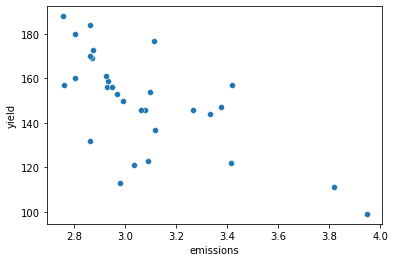

In [17]:
sns.scatterplot(X_train_smote.emissions, X_train_smote['yield'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emissions', ylabel='yield'>

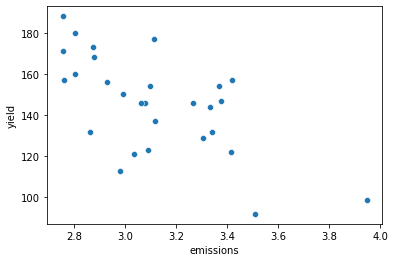

In [18]:
sns.scatterplot(data.emissions, data['yield'])

In [19]:
smote_data = X_train_smote.join(y_train_smote)

ADASYN Oversampling

In [20]:
from imblearn.over_sampling import ADASYN

In [21]:
ada = ADASYN(n_neighbors=3, random_state=rand_state)

In [22]:
adasyn_y = train_data.cover_crop_dummy
adasyn_X = train_data.drop('cover_crop_dummy', axis=1)

In [23]:
X_train_adasyn, y_train_adasyn = ada.fit_resample(adasyn_X, adasyn_y) 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emissions', ylabel='yield'>

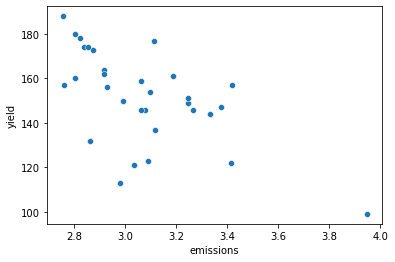

In [24]:
sns.scatterplot(X_train_adasyn.emissions, X_train_adasyn['yield'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emissions', ylabel='yield'>

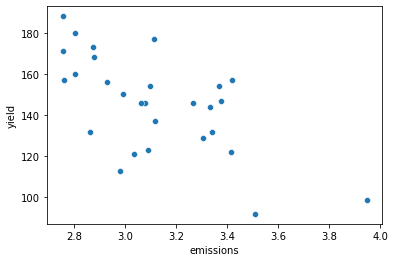

In [25]:
sns.scatterplot(data.emissions, data['yield'])

In [26]:
adasyn_data = X_train_adasyn.join(y_train_adasyn)

Create ECDF's for the different oversampling techniques - ADASYN appears to create more normally distributed data than SMOTE

In [27]:
def ecdf(data):
  """Compute ECDF for a one-dimensional array of measurements."""
  n = len(data)
  x = np.sort(data)
  y = np.arange(1, n+1) / n
  
  return x, y

# call function as follows: x, y = ecdf(data)

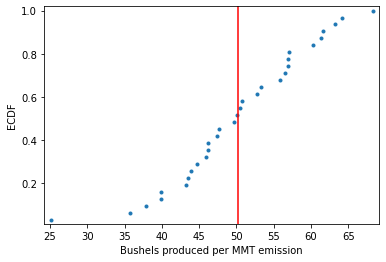

In [28]:
efficiency = adasyn_data.efficiency

x, y = ecdf(efficiency)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.margins(.02)
_ = plt.xlabel('Bushels produced per MMT emission')
_ = plt.ylabel('ECDF')
_ = plt.axvline(np.mean(efficiency), color='red')

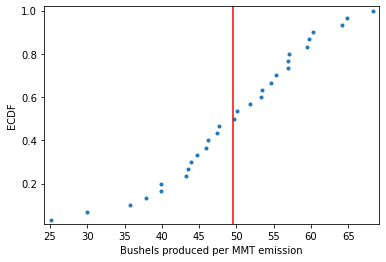

In [29]:
efficiency = smote_data.efficiency

x, y = ecdf(efficiency)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.margins(.02)
_ = plt.xlabel('Bushels produced per MMT emission')
_ = plt.ylabel('ECDF')
_ = plt.axvline(np.mean(efficiency), color='red')

Simple regression analysis - Data oversampled with ADASYN delivers a higher R2 value than data oversampled using SMOTE

In [30]:
y = adasyn_data.efficiency
X = adasyn_data.drop(['emissions', 'yield', 'efficiency'], axis=1)

In [31]:
lm = sk.linear_model.LinearRegression()
model = lm.fit(X,y)

In [32]:
lm.score(X,y)

0.6915960626357738

In [33]:
y = smote_data.efficiency
X = smote_data.drop(['emissions', 'yield', 'efficiency'], axis=1)

In [34]:
lm = sk.linear_model.LinearRegression()
model = lm.fit(X,y)

In [35]:
lm.score(X,y)

0.6975651814901034

Bootstrap

In [36]:
bootstrap_data = adasyn_data

In [37]:
size = int(len(adasyn_data))
post_bootstrap = bootstrap_data
seed = rand_state
while size < 300:
    random_sample = bootstrap_data.sample(n=1, replace=True, random_state=seed)
    post_bootstrap = pd.concat([post_bootstrap, random_sample])
    size = len(post_bootstrap)
    seed += rand_state

In [38]:
post_bootstrap.cover_crop_dummy.value_counts()

False    151
True     149
Name: cover_crop_dummy, dtype: int64

In [39]:
post_bootstrap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 23
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 300 non-null    int64  
 1   nitrogen             300 non-null    float64
 2   phosphate            300 non-null    float64
 3   potash               300 non-null    float64
 4   precipitation        300 non-null    float64
 5   average_temperature  300 non-null    float64
 6   accumulated_gdd      300 non-null    float64
 7   full_till_ratio      300 non-null    float64
 8   cover_crop_ratio     300 non-null    float64
 9   efficiency           300 non-null    float64
 10  total_acres          300 non-null    float64
 11  emissions            300 non-null    float64
 12  yield                300 non-null    int64  
 13  cover_crop_dummy     300 non-null    bool   
dtypes: bool(1), float64(11), int64(2)
memory usage: 33.1 KB


In [40]:
post_bootstrap.efficiency.max()

68.27548650369768

In [41]:
processed_data = post_bootstrap.drop('cover_crop_dummy', axis=1)

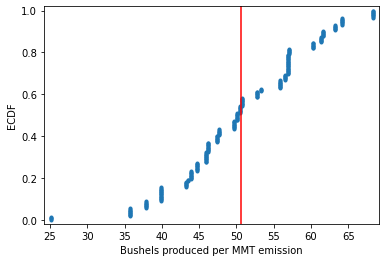

In [42]:
efficiency = processed_data.efficiency

x, y = ecdf(efficiency)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.margins(.02)
_ = plt.xlabel('Bushels produced per MMT emission')
_ = plt.ylabel('ECDF')
_ = plt.axvline(np.mean(efficiency), color='red')

In [43]:
processed_data.to_csv('/Users/coleromanyk/Documents/GitHub/Capstone-2/Data/adasyn_data.csv', index=False)
hold_out.to_csv('/Users/coleromanyk/Documents/GitHub/Capstone-2/Data/hold_out_data.csv', index=False)

Removal of 2012 (Outlier data)

In [44]:
outlier_train = train_data[(train_data.efficiency > 30)\
                           & (train_data.efficiency < 65)]
outlier_test = hold_out[(hold_out.efficiency > 30) &\
                       (hold_out.efficiency < 65)]

In [45]:
X_outl = outlier_train.drop('cover_crop_dummy', axis=1)
y_outl = outlier_train.cover_crop_dummy

In [46]:
X_out, y_out = ada.fit_resample(X_outl, y_outl) 

In [47]:
outlier_data = X_out.join(y_out)

In [48]:
no_outlier = outlier_data

In [49]:
size = int(len(X_out))
outlier_bootstrap = no_outlier
seed = rand_state
while size < 300:
    random_sample = no_outlier.sample(n=1, replace=True, random_state=seed)
    outlier_bootstrap = pd.concat([outlier_bootstrap, random_sample])
    size = len(outlier_bootstrap)
    seed += rand_state

In [50]:
outlier_bootstrap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 28
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 300 non-null    int64  
 1   nitrogen             300 non-null    float64
 2   phosphate            300 non-null    float64
 3   potash               300 non-null    float64
 4   precipitation        300 non-null    float64
 5   average_temperature  300 non-null    float64
 6   accumulated_gdd      300 non-null    float64
 7   full_till_ratio      300 non-null    float64
 8   cover_crop_ratio     300 non-null    float64
 9   efficiency           300 non-null    float64
 10  total_acres          300 non-null    float64
 11  emissions            300 non-null    float64
 12  yield                300 non-null    int64  
 13  cover_crop_dummy     300 non-null    bool   
dtypes: bool(1), float64(11), int64(2)
memory usage: 33.1 KB


In [51]:
outlier_bootstrap.to_csv('/Users/coleromanyk/Documents/GitHub/Capstone-2/Data/outlier_data.csv', index=False)
outlier_test.to_csv('/Users/coleromanyk/Documents/GitHub/Capstone-2/Data/outlier_ho.csv', index=False)

###Standardization is done as part of the pipeline during modeling notebook.###